In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('BaseOrdinal.csv')
ordinal.shape

(2580, 83)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
gb = GradientBoostingRegressor(random_state=1)
cb = CatBoostRegressor(random_state=1, verbose=False)
xgb = XGBRegressor()
lgbm = lgb.LGBMRegressor()

In [6]:
stacking_regressor1 = StackingRegressor(estimators=[('LGBM', lgbm)], final_estimator=cb, 
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [7]:
stacking_regressor1.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('LGBM', LGBMRegressor())],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7f84d865ebe0>,
                  passthrough=True)

In [8]:
stacking_regressor1.score(X,y)

0.991940861796939

### cv=5, cv=5, or None has no impact on stacking_regressor.score

In [9]:
stacking_regressor4 = StackingRegressor(estimators=[('LGBM', lgbm)], final_estimator=cb,
                                        cv=5,
                                        passthrough=True)

In [10]:
stacking_regressor4.fit(X,y)

StackingRegressor(cv=5, estimators=[('LGBM', LGBMRegressor())],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7f84d865ebe0>,
                  passthrough=True)

In [11]:
stacking_regressor4.score(X,y)

0.9925526248331514

In [12]:
scores4 = cross_validate(stacking_regressor4, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [13]:
scores4

{'fit_time': array([2.57142401, 4.45969892, 4.33533406, 2.59465289, 2.7193892 ]),
 'score_time': array([0.00602698, 0.00667596, 0.00583696, 0.00601506, 0.00654483]),
 'estimator': [StackingRegressor(cv=5, estimators=[('LGBM', LGBMRegressor())],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f84a0050160>,
                    passthrough=True),
  StackingRegressor(cv=5, estimators=[('LGBM', LGBMRegressor())],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f84a0050d30>,
                    passthrough=True),
  StackingRegressor(cv=5, estimators=[('LGBM', LGBMRegressor())],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f84a0050910>,
                    passthrough=True),
  StackingRegressor(cv=5, estimators=[('LGBM', LGBMRegressor())],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f84d8346dc0>,
                    passthrough=True),
  StackingRegress

In [14]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [15]:
cat = evaluate_model(cb, X, y)

In [16]:
cat

,fit_time,score_time,test_score
0,6.099594,0.017003,0.926950
1,6.361652,0.010665,0.898789
2,6.204176,0.011857,0.936517
3,6.817361,0.032355,0.929022
4,6.848318,0.035942,0.950638
5,6.279727,0.025050,0.936688
6,6.737649,0.004907,0.942846
7,6.167812,0.005976,0.926769
8,5.643534,0.013563,0.945508
9,5.584434,0.007962,0.884738


In [17]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [18]:
cat

,cat_score
0,0.926950
1,0.898789
2,0.936517
3,0.929022
4,0.950638
5,0.936688
6,0.942846
7,0.926769
8,0.945508
9,0.884738


In [19]:
df4 = evaluate_model(stacking_regressor4, X, y)

In [20]:
df4

,fit_time,score_time,test_score
0,7.758245,0.013079,0.914586
1,10.204243,0.025244,0.899562
2,9.232366,0.041117,0.927972
3,6.932542,0.013649,0.920913
4,9.314967,0.037676,0.947282
5,9.530936,0.034504,0.922377
6,9.225677,0.034564,0.939260
7,7.730720,0.013249,0.919167
8,5.942227,0.037399,0.945749
9,6.627710,0.013937,0.890079


In [21]:
df4 = df4[['test_score']].rename(columns={'test_score':'test_score_4'})

In [22]:
df4

,test_score_4
0,0.914586
1,0.899562
2,0.927972
3,0.920913
4,0.947282
5,0.922377
6,0.939260
7,0.919167
8,0.945749
9,0.890079


In [23]:
combo = pd.concat([cat, df4], axis=1)

In [24]:
combo

,cat_score,test_score_4
0,0.926950,0.914586
1,0.898789,0.899562
2,0.936517,0.927972
3,0.929022,0.920913
4,0.950638,0.947282
5,0.936688,0.922377
6,0.942846,0.939260
7,0.926769,0.919167
8,0.945508,0.945749
9,0.884738,0.890079


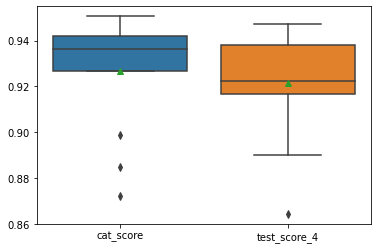

In [25]:
sns.boxplot(data=combo, showmeans=True);

In [26]:
combo.describe()

,cat_score,test_score_4
count,15.000000,15.000000
mean,0.926683,0.921448
std,0.023191,0.022650
min,0.872051,0.864305
25%,0.926860,0.916877
50%,0.936517,0.922377
75%,0.942064,0.938194
max,0.950638,0.947282
